## About the Dataset

Expedia is the world’s largest online travel agency (OTA) and powers search results for millions of travel shoppers every day. In this competitive market matching users to hotel inventory is very important since users easily jump from website to website. As such, having the best ranking of hotels (“sort”) for specific users with the best integration of price competitiveness gives an OTA the best chance of winning the sale.

Expedia has provided a dataset that includes shopping and purchase data as well as information on price competitiveness. The data are organized around a set of “search result impressions”, or the ordered list of hotels that the user sees after they search for a hotel on the Expedia website. In addition to impressions from the existing algorithm, the data contain impressions where the hotels were randomly sorted, to avoid the position bias of the existing algorithm. The user response is provided as a click on a hotel or/and a purchase of a hotel room.

Appended to impressions are the following:

1) Hotel characteristics
2) Location attractiveness of hotels
3) User’s aggregate purchase history
4) Competitive OTA information

link to dataset https://www.kaggle.com/c/expedia-personalized-sort/overview


### Predicting Click-Through in Hotel Online Ranking

At the core of hotel personalization and ranking is the challenge of matching a set of hotels to a set of travelers whose tastes are heterogeneous and sometimes unobserved. The accuracy of the match depends on how online travel agencies (OTA) leverage their available information such as given hotel characteristics, location attractiveness of hotels, users aggregated purchase history and competitors’ information, and among others, to infer travelers preferences for hotels.

### Goal
Applying machine learning techniques to maximize the click-through for the presented choices, where a click indicates a visitor’s interest and potentially a decision to book.

when a user inputs his (or her) search criteria into the hotel search engine, a filtered personalized sorted list of available hotels will be shown to him (or her) according to the above ranking algorithm, so that the hotels at the top of the list are the ones with the highest probability of being clicked by the user.

## 1. Data Pre processing

In [2]:
import pandas as pd
df=pd.read_csv("train_2.csv")

In [3]:
df.shape

(3224281, 54)

In [6]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        3062339
visitor_hist_adr_usd           3061755
prop_country_id                      0
prop_id                              0
prop_starrating                      1
prop_review_score                 4767
prop_brand_bool                      1
prop_location_score1                 1
prop_location_score2            706200
prop_log_historical_price            1
position                             1
price_usd                            1
promotion_flag                       1
srch_destination_id                  1
srch_length_of_stay                  1
srch_booking_window                  1
srch_adults_count                    1
srch_children_count                  1
srch_room_count                      1
srch_saturday_night_bool             1
srch_query_affinity_score      3018699
orig_destination_distance

In [46]:
df.position.value_counts()

1.0     129627
2.0     129597
3.0     129592
6.0     129476
7.0     126587
4.0     125756
8.0     123666
9.0     120987
12.0    115888
13.0    113644
10.0    112774
14.0    111258
15.0    108918
18.0    104376
19.0    102182
16.0    100586
20.0    100043
21.0     97886
24.0     93438
25.0     91214
22.0     89783
26.0     88997
27.0     86927
28.0     84777
29.0     82581
30.0     80081
31.0     77268
32.0     72668
33.0     68755
34.0     64523
35.0     57007
36.0     43572
37.0     24084
17.0      7350
11.0      7277
23.0      7031
38.0      7020
5.0       6035
39.0      1011
40.0        38
Name: position, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3224281 entries, 0 to 3224280
Data columns (total 26 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
prop_country_id                int64
prop_id                        int64
prop_starrating                float64
prop_review_score              float64
prop_brand_bool                float64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       float64
price_usd                      float64
promotion_flag                 float64
srch_destination_id            float64
srch_length_of_stay            float64
srch_booking_window            float64
srch_adults_count              float64
srch_children_count            float64
srch_room_count                float64
srch_saturday_night_bool       float64
orig_destination_distance      float64
r

* Changing data types of categorical columns

In [51]:
df['click_bool'] = df['click_bool'].astype(object)
df['booking_bool'] = df['booking_bool'].astype(object)
df['prop_starrating'] = df['prop_starrating'].astype(object)
df['prop_brand_bool'] = df['prop_brand_bool'].astype(object)
df['promotion_flag'] = df['promotion_flag'].astype(object)
df['srch_saturday_night_bool'] = df['srch_saturday_night_bool'].astype(object)
df['random_bool'] = df['random_bool'].astype(object)
df['prop_country_id'] = df['prop_country_id'].astype(object)
df['prop_id'] = df['prop_id'].astype(object)
df['srch_destination_id'] = df['srch_destination_id'].astype(object)
df['srch_id'] = df['srch_id'].astype(object)
df['site_id'] = df['site_id'].astype(object)
df['visitor_location_country_id'] = df['visitor_location_country_id'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3224281 entries, 0 to 3224280
Data columns (total 26 columns):
srch_id                        object
date_time                      object
site_id                        object
visitor_location_country_id    object
prop_country_id                object
prop_id                        object
prop_starrating                object
prop_review_score              float64
prop_brand_bool                object
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       float64
price_usd                      float64
promotion_flag                 object
srch_destination_id            object
srch_length_of_stay            float64
srch_booking_window            float64
srch_adults_count              float64
srch_children_count            float64
srch_room_count                float64
srch_saturday_night_bool       object
orig_destination_distance      float64
r

### 1.1 Deleting Features with more than 40% Missing Data 

In [7]:
df.dropna(thresh=df.shape[0]*0.60,how='any',axis=1,inplace=True) #thres - require that many non-NA values
df.shape

#df_null = df.isnull().sum() / len(df)
#missing_features = df_null[df_null > 0.40].index
#print(missing_features)
#df.drop(missing_features, axis=1, inplace=True)

(3224281, 26)

In [8]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      1
prop_review_score                 4767
prop_brand_bool                      1
prop_location_score1                 1
prop_location_score2            706200
prop_log_historical_price            1
position                             1
price_usd                            1
promotion_flag                       1
srch_destination_id                  1
srch_length_of_stay                  1
srch_booking_window                  1
srch_adults_count                    1
srch_children_count                  1
srch_room_count                      1
srch_saturday_night_bool             1
orig_destination_distance      1045781
random_bool                          1
click_bool                           1
booking_bool             

### 1.2 Handling Missing Values

#### 1.2.1  prop_review_score
* The mean customer review score for the hotel on a scale out of 5, rounded to 0.5 increments. A 0 means there have been no reviews, null that the information is not available.

#### Number of Unique Hotels / property Id

In [10]:
len(df.prop_id.unique())

122831

#### Imputing review score as the mean score for that hotel

In [34]:
df['prop_review_score'].fillna(df.groupby('prop_id')['prop_review_score'].transform('mean'),inplace=True)

In [35]:
df.prop_review_score.isnull().sum()

4767

In [28]:
df[df.prop_review_score.isnull()].groupby('prop_id')['prop_id'].count().sort_values(inplace=False)

prop_id
140668      1
129878      1
62684       1
62769       1
63305       1
63462       1
63613       1
64566       1
129803      1
64761       1
65458       1
66134       1
66268       1
129681      1
66317       1
66390       1
129623      1
140543      1
67534       1
129491      1
68194       1
68276       1
62318       1
129415      1
62258       1
61970       1
57675       1
58067       1
58131       1
58374       1
         ... 
126663     20
72977      20
64612      20
104391     21
11624      21
5719       21
112387     21
137610     22
65011      22
68170      22
34076      23
97573      23
71238      24
110580     25
117174     25
33213      26
43049      28
16696      28
52282      30
106188     30
66298      31
71252      32
66864      37
133760     41
59292      42
71041      42
32424      48
1772       49
66663      51
100882    137
Name: prop_id, dtype: int64

We can see that the hotels for which we have no rating info available are not very popular since their frequency ranges from 1-50  out of 32 lakh records. Lets see if these hotels had a click or not

In [23]:
df_prop_review_null = df[df.prop_review_score.isnull()]
df_prop_review_null.shape

(4767, 26)

In [29]:
df_prop_review_null.click_bool.value_counts()

0.0    4605
1.0     161
Name: click_bool, dtype: int64

#### Imputing review score as the mean score for hotels in that country

If we had more info about the area to which these property belong to we would have imputed score by the mean score of hotels beloning to that area. Since no such info is available. Only country of property is available. We will impute them by the mean 
rating for hotels in that country. 

In [36]:
df.prop_review_score.fillna(df.groupby('prop_country_id')['prop_review_score'].transform('mean'),inplace=True)
df.prop_review_score.isnull().sum()

0

#### 1.2.2  prop_location_score2
* A (second) score outlining the desirability of the hotel’s location

In [42]:
df.prop_location_score2.isnull().sum()

706200

* Lets check if prop_location_score1 and prop_location_score2 are same or not on an average. If same we can impute missing
values of prop_location_score2 with prop_location_score1

In [43]:
df_difference_loc_score = abs(df.prop_location_score2-df.prop_location_score1)
df_difference_loc_score.value_counts()

3.6663    2616
0.0002    2112
0.0001    2039
0.0004    1919
3.9653    1780
0.6898    1763
0.6899    1758
0.0003    1659
0.0000    1563
0.0005    1492
3.9066    1456
3.8903    1444
4.0510    1418
0.6897    1418
3.9268    1409
4.0515    1403
3.8982    1392
0.0006    1388
0.0007    1372
4.0619    1371
3.7854    1368
3.8492    1355
4.0627    1349
2.9888    1348
4.0232    1343
4.0902    1339
3.9327    1337
0.6895    1335
3.7004    1333
3.9800    1328
          ... 
0.8628       1
4.9673       1
5.2265       1
0.5178       1
4.7890       1
3.9555       1
1.2290       1
3.7778       1
0.8644       1
1.3652       1
5.6358       1
4.3386       1
1.7394       1
0.4932       1
1.3183       1
1.0835       1
2.1446       1
1.3321       1
1.9825       1
4.2759       1
4.7367       1
5.4008       1
5.6740       1
4.1374       1
3.0373       1
2.8842       1
6.2244       1
0.1627       1
3.7367       1
0.5760       1
dtype: int64

In [ ]:
* As we can see there is a difference between the 2 scores. The score lies between 0 to 1 and is rounded upto 3 decimal places.
Lets check if there is a correlation of this column with others (if yes we can predict it)

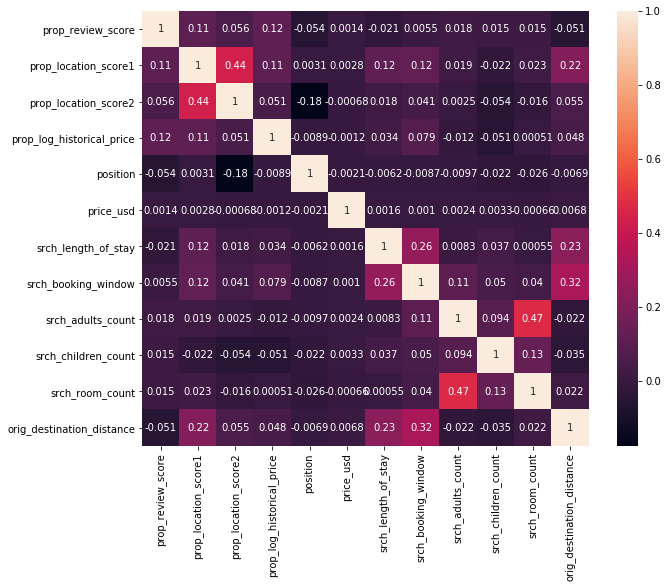

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cbar=True)

* We can see that prop_location_score2 only has correlation with prop_location_score1 as expected.
* Location score is different for each hotel.  
* Its worth noting that prop_location_score2 lies between 0 and 1 and prop_location_score1 lies between 2 to 7. 

* Imputing prop_location_score2 missing values with prop_location_score1/100

In [71]:
df['prop_location_score2'].fillna(df['prop_location_score1']/100,inplace=True)
df.prop_location_score2.isnull().sum()

1

#### 1.2.3 orig_destination_distance
* Physical distance between the hotel and the customer at the time of search. A null means the distance could not be calculated.

In [92]:
df[df.orig_destination_distance.isnull()][['visitor_location_country_id','prop_country_id','prop_id','orig_destination_distance']]

,visitor_location_country_id,prop_country_id,prop_id,orig_destination_distance
0,187,219,893,NaN
1,187,219,10404,NaN
2,187,219,21315,NaN
3,187,219,27348,NaN
4,187,219,29604,NaN
5,187,219,30184,NaN
6,187,219,44147,NaN
7,187,219,50984,NaN
8,187,219,53341,NaN
9,187,219,56880,NaN


In [79]:
df[~df.orig_destination_distance.isnull()][['visitor_location_country_id','prop_country_id','prop_id','orig_destination_distance']]

,visitor_location_country_id,prop_country_id,prop_id,orig_destination_distance
28,219,219,3625,238.35
29,219,219,11622,238.34
30,219,219,11826,238.33
31,219,219,22824,238.29
32,219,219,37581,238.35
33,219,219,39993,237.94
34,219,219,46162,238.32
35,219,219,49152,238.30
36,219,219,56063,238.33
37,219,219,56472,238.54


In [103]:
df[(~df.orig_destination_distance.isnull()) & (df.visitor_location_country_id == 219) & (df.prop_country_id == 219)][['visitor_location_country_id','prop_country_id','prop_id','orig_destination_distance']]

,visitor_location_country_id,prop_country_id,prop_id,orig_destination_distance
28,219,219,3625,238.35
29,219,219,11622,238.34
30,219,219,11826,238.33
31,219,219,22824,238.29
32,219,219,37581,238.35
33,219,219,39993,237.94
34,219,219,46162,238.32
35,219,219,49152,238.30
36,219,219,56063,238.33
37,219,219,56472,238.54


In [128]:
df.mean_dist = df.groupby(['visitor_location_country_id','prop_country_id'])['orig_destination_distance'].mean()
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,1.0,0.0,4.0,0.0,1.0,1,NaN,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,1.0,0.0,4.0,0.0,1.0,1,NaN,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,1.0,0.0,4.0,0.0,1.0,1,NaN,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,1.0,0.0,4.0,0.0,1.0,1,NaN,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,1.0,0.0,4.0,0.0,1.0,1,NaN,1,0,0


In [134]:
len(df.mean_dist.value_counts())
# Only 741 entries are there for which the mean distance can be imputed, So we cant use this imputing technique

741

In [135]:
df.orig_destination_distance.fillna(df.groupby(['prop_country_id'])['orig_destination_distance'].transform('mean'),inplace=True)
df.orig_destination_distance.isnull().sum()

279

In [136]:
df.isnull().sum()

srch_id                          0
date_time                        0
site_id                          0
visitor_location_country_id      0
prop_country_id                  0
prop_id                          0
prop_starrating                  1
prop_review_score                0
prop_brand_bool                  1
prop_location_score1             1
prop_location_score2             1
prop_log_historical_price        1
position                         1
price_usd                        1
promotion_flag                   1
srch_destination_id              1
srch_length_of_stay              1
srch_booking_window              1
srch_adults_count                1
srch_children_count              1
srch_room_count                  1
srch_saturday_night_bool         1
orig_destination_distance      279
random_bool                      1
click_bool                       1
booking_bool                     1
dtype: int64

### 1.2 Dropping Missing Values now

In [137]:
df.dropna(how='any',inplace=True)
df.shape

(3224001, 26)

In [138]:
df.isnull().sum()

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
click_bool                     0
booking_bool                   0
dtype: int64

### 1.3 Checking Distribution of the columns and Binning ones with very large number of levels

#### 1.3.1 srch_id

In [141]:
len(df.srch_id.unique())

129834

This implies we have search results of 129834 users

#### 1.3.2 site_id

In [143]:
df.site_id.value_counts()

5     2011102
14     311490
15     203306
24     154584
32     116299
18      82379
16      56831
12      47351
9       27547
19      27140
22      25992
11      23322
7       20902
29      18443
31      15691
26      10282
4        8882
25       8114
23       7554
1        7108
34       6110
10       5783
13       5313
17       3828
2        3423
27       3025
28       2827
21       2437
30       2419
3        2284
6        1724
33        345
20        133
8          31
Name: site_id, dtype: int64

We can see that there are site ids 5,14,15,24,32 are the most popular. To reduce the number of levels of this categorical column we will bin this column. 

In [185]:
popular_sites = [5,14,15,24,32,18,16,12]
df['site_id_binned'] = [x if x in popular_sites else 99 for x in df['site_id']]

In [189]:
df['site_id_binned'].value_counts()

5     2011102
14     311490
99     240659
15     203306
24     154584
32     116299
18      82379
16      56831
12      47351
Name: site_id_binned, dtype: int64

Text(0.5, 1.0, 'Popularity of Sites')

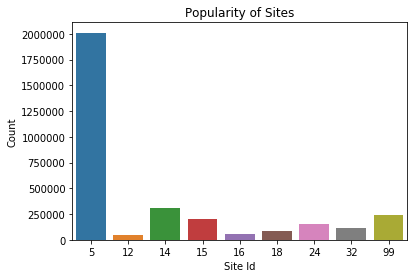

In [192]:
sns.countplot(df.site_id_binned)
plt.xlabel('Site Id')
plt.ylabel('Count')
plt.title('Popularity of Sites')

#### 1.3.3 visitor_location_country_id

In [195]:
print("Number of unique visitor Locations :",len(df.visitor_location_country_id.value_counts()))
df.visitor_location_country_id.value_counts()

Number of unique visitor Locations : 202


219    1884112
100     320373
55      190293
216     141583
220     114436
129      80038
31       58514
99       43045
59       40278
92       29095
158      28399
103      23821
132      20548
117      17318
50       12613
39       11722
215      10692
181       8052
13        7897
98        7819
15        7691
32        7639
205       6565
81        6398
33        6073
56        6018
4         5870
23        5798
212       5419
14        5331
        ...   
180         45
62          41
20          40
183         39
201         38
222         36
191         36
228         33
118         33
210         33
94          32
170         31
27          31
54          31
34          31
217         31
64          31
58          30
198         30
193         29
101         28
209         27
66          27
172         27
52          25
136         17
190         16
146         15
83          13
208         12
Name: visitor_location_country_id, dtype: int64

In [196]:
# Binning visitor Locations
popular_visitor_countries = [219,100,55,216,220,129,31,99,59]
df['visitor_location_country_id_binned'] = [x if x in popular_visitor_countries else 9999 for x in df['visitor_location_country_id']]
df['visitor_location_country_id_binned'].value_counts()

219     1884112
9999     351329
100      320373
55       190293
216      141583
220      114436
129       80038
31        58514
99        43045
59        40278
Name: visitor_location_country_id_binned, dtype: int64

#### 1.3.4 prop_country_id

In [197]:
df.prop_country_id.value_counts()

219    1973622
100     199928
55      121931
31       98445
99       87067
129      59552
215      52175
220      45983
59       45923
216      40309
98       34886
158      27125
117      20496
132      18997
205      18821
39       18593
92       17646
103      16296
15       15499
81       12841
32       12785
14       12397
202      12342
4        12276
109      11460
73       11150
41       10388
56       10280
80        9702
225       9228
        ...   
124         94
179         94
112         73
143         73
83          72
171         67
44          59
120         50
136         45
20          43
192         41
1           37
172         37
197         33
82          29
25          25
167         25
185         21
141         21
19          17
226         16
128         15
217         14
87          13
111         13
180         12
208         12
7           10
204          5
140          5
Name: prop_country_id, dtype: int64

In [198]:
popular_prop_countries = [219,100,55,31,99,129,215,220,59,216]
df['prop_country_id_binned'] = [x if x in popular_prop_countries else 9999 for x in df['prop_country_id']]
df['prop_country_id_binned'].value_counts()

219     1973622
9999     499066
100      199928
55       121931
31        98445
99        87067
129       59552
215       52175
220       45983
59        45923
216       40309
Name: prop_country_id_binned, dtype: int64

#### 1.3.5 prop_id - Try another approach 

In [200]:
print("Number of unique property_id or Hotels are : ",len(df.prop_id.value_counts()))

Number of unique property_id or Hotels are :  122685


In [217]:
property_id_dict = {}
property_id_dict = df.prop_id.value_counts()

In [226]:
#df['prop_id_binned'] = [a.key]
popular_properties = [key for key,value in property_id_dict.items() if value > 700]

In [228]:
df['prop_id_binned'] = [x if x in popular_properties else 999999 for x in df['prop_id']]
df['prop_id_binned'].value_counts()

999999    3155251
124342       1556
104517       1551
68420        1491
40279        1489
137997       1472
134154       1472
59781        1463
49656        1459
60846        1456
77089        1451
116942       1440
59657        1434
24545        1430
35223        1423
60468        1423
38419        1421
21018        1419
37818        1411
77795        1404
70177        1387
14082        1382
122112       1377
46274        1376
94455        1376
78500        1357
90845        1332
114932       1307
131892       1303
117294       1291
           ...   
26248        1185
90809        1165
61529        1149
53494        1137
1230         1057
126657       1053
77914        1039
7880         1018
3213         1010
90730         901
15994         874
69261         869
41278         850
41712         839
135499        818
23268         808
105408        804
13674         791
138600        780
79740         776
17633         774
8864          766
34151         758
44923         751
23212     

#### 1.3.6 srch_destination_id  

In [229]:
df.srch_destination_id.value_counts()

8192.0     45592
4562.0     36767
9402.0     26986
8347.0     21647
10979.0    21256
13292.0    20957
13870.0    18925
18774.0    17751
23904.0    16802
24700.0    15817
13216.0    15578
20319.0    14787
5143.0     14724
15307.0    14087
3073.0     13703
6948.0     13155
21871.0    13030
26067.0    12624
15122.0    12590
17713.0    12036
25426.0    10863
3694.0     10734
25479.0    10700
23090.0    10427
23605.0    10173
2303.0     10141
15620.0     9732
7714.0      9705
13539.0     9577
24731.0     8872
           ...  
21886.0        5
16641.0        5
14739.0        5
5678.0         5
2028.0         5
11386.0        5
20346.0        5
7068.0         5
20380.0        5
22295.0        5
20381.0        5
27443.0        5
22287.0        5
9687.0         5
7899.0         5
2037.0         5
2021.0         5
6421.0         5
22266.0        5
25174.0        5
27390.0        5
18771.0        5
22247.0        5
22220.0        5
11473.0        5
686.0          5
5943.0         5
27364.0       

In [231]:
srch_dest_dict = {}
srch_dest_dict = df.srch_destination_id.value_counts()
popular_search_dest = [key for key,value in srch_dest_dict.items() if value > 5000]

In [232]:
df['srch_destination_id_binned'] = [x if x in popular_search_dest else 999999 for x in df['srch_destination_id']]
df['srch_destination_id_binned'].value_counts()

999999.0    2418764
8192.0        45592
4562.0        36767
9402.0        26986
8347.0        21647
10979.0       21256
13292.0       20957
13870.0       18925
18774.0       17751
23904.0       16802
24700.0       15817
13216.0       15578
20319.0       14787
5143.0        14724
15307.0       14087
3073.0        13703
6948.0        13155
21871.0       13030
26067.0       12624
15122.0       12590
17713.0       12036
25426.0       10863
3694.0        10734
25479.0       10700
23090.0       10427
23605.0       10173
2303.0        10141
15620.0        9732
7714.0         9705
13539.0        9577
             ...   
19215.0        6843
27730.0        6604
25556.0        6504
5872.0         6355
8660.0         6340
19898.0        6301
1986.0         6241
2142.0         6140
2518.0         6135
7384.0         6000
4075.0         5983
15438.0        5928
9899.0         5908
4748.0         5893
9358.0         5795
18495.0        5733
16076.0        5696
9412.0         5690
11308.0        5644


In [235]:
print("Number of search destinations after binning :", len(df['srch_destination_id_binned'].value_counts()))

Number of search destinations after binning : 81


#### 1.3.7 srch_length_of_stay

In [236]:
df.srch_length_of_stay.value_counts()

1.0     1391929
2.0      784963
3.0      465034
4.0      242319
5.0      121107
7.0       75558
6.0       66692
8.0       22280
9.0       12609
10.0      11637
14.0       8602
11.0       5614
12.0       4199
13.0       3161
15.0       1872
16.0        938
17.0        905
21.0        864
19.0        646
18.0        622
28.0        466
20.0        433
25.0        296
24.0        272
27.0        257
26.0        251
22.0        233
23.0        113
33.0         32
34.0         32
44.0         22
30.0         20
41.0         10
57.0          7
29.0          6
Name: srch_length_of_stay, dtype: int64

In [237]:
#we are capping search length of stay above 15 to 15
df['srch_lenth_of_stay_bin'] = [15 if x > 15 else x for x in df['srch_length_of_stay']]
df['srch_lenth_of_stay_bin'].value_counts()

1.0     1391929
2.0      784963
3.0      465034
4.0      242319
5.0      121107
7.0       75558
6.0       66692
8.0       22280
9.0       12609
10.0      11637
14.0       8602
15.0       8297
11.0       5614
12.0       4199
13.0       3161
Name: srch_lenth_of_stay_bin, dtype: int64

#### 1.3.8 srch_booking_window
* Number of days in the future the hotel stay started from the search date

In [238]:
df.srch_booking_window.value_counts()

1.0      244200
0.0      180289
2.0      159374
3.0      133094
4.0      119307
5.0       99590
6.0       90160
7.0       79770
8.0       72630
9.0       66282
10.0      62468
11.0      60020
12.0      51588
13.0      49119
14.0      47572
15.0      45607
17.0      43775
16.0      43121
18.0      39881
19.0      38288
20.0      36579
21.0      36205
24.0      33827
22.0      32325
23.0      31765
25.0      31485
26.0      30068
27.0      29554
28.0      28226
29.0      27212
          ...  
394.0        29
438.0        27
339.0        27
354.0        24
336.0        23
376.0        21
414.0        21
369.0        20
396.0        18
435.0        17
440.0        15
467.0        14
477.0        12
342.0        11
415.0        11
441.0        11
402.0        10
480.0        10
391.0         9
492.0         8
381.0         8
448.0         7
472.0         7
433.0         5
463.0         5
421.0         5
419.0         5
382.0         5
478.0         5
401.0         5
Name: srch_booking_windo

In [239]:
srch_booking_window_dict = {}
srch_booking_window_dict = df.srch_booking_window.value_counts()
for key,value in srch_booking_window_dict.items():
    if value <= 10000:
        print(key)

63.0
66.0
64.0
73.0
67.0
69.0
74.0
70.0
72.0
68.0
71.0
81.0
78.0
77.0
75.0
80.0
88.0
76.0
86.0
82.0
84.0
79.0
83.0
85.0
90.0
95.0
87.0
89.0
91.0
94.0
93.0
96.0
92.0
98.0
100.0
105.0
99.0
101.0
102.0
103.0
97.0
106.0
113.0
110.0
108.0
104.0
115.0
109.0
112.0
117.0
121.0
111.0
107.0
123.0
114.0
122.0
118.0
127.0
116.0
136.0
128.0
119.0
120.0
130.0
125.0
124.0
129.0
132.0
133.0
139.0
135.0
146.0
134.0
131.0
126.0
143.0
145.0
137.0
157.0
154.0
144.0
150.0
138.0
140.0
149.0
163.0
153.0
148.0
161.0
156.0
141.0
142.0
160.0
152.0
151.0
158.0
165.0
181.0
168.0
162.0
164.0
177.0
170.0
184.0
166.0
147.0
155.0
159.0
178.0
180.0
175.0
176.0
192.0
173.0
188.0
167.0
179.0
195.0
183.0
185.0
169.0
186.0
190.0
191.0
200.0
187.0
199.0
172.0
182.0
201.0
174.0
193.0
171.0
204.0
205.0
194.0
189.0
210.0
202.0
212.0
227.0
206.0
222.0
197.0
226.0
214.0
196.0
207.0
218.0
198.0
213.0
217.0
203.0
211.0
224.0
233.0
215.0
232.0
223.0
208.0
221.0
246.0
228.0
230.0
234.0
216.0
220.0
241.0
209.0
240.0
235.0
219.0
225.

In [242]:
popular_srch_booking_window = [key for key,value in srch_booking_window_dict.items() if value > 10000]

No need to bin this column as this a numerical column
#df['srch_booking_window_bin'] = [x if x in popular_srch_booking_window else 63 for x in df['srch_booking_window']]
#df['srch_booking_window_binned'].value_counts()

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3224001 entries, 0 to 3224279
Data columns (total 32 columns):
srch_id                               object
date_time                             object
site_id                               object
visitor_location_country_id           object
prop_country_id                       object
prop_id                               object
prop_starrating                       object
prop_review_score                     float64
prop_brand_bool                       object
prop_location_score1                  float64
prop_location_score2                  float64
prop_log_historical_price             float64
position                              float64
price_usd                             float64
promotion_flag                        object
srch_destination_id                   object
srch_length_of_stay                   float64
srch_booking_window                   float64
srch_adults_count                     float64
srch_children_count    

#### 1.3.9 srch_adults_count

In [246]:
df.srch_adults_count.value_counts()

2.0    2111120
1.0     753868
4.0     157194
3.0     155191
6.0      18867
5.0      17313
8.0       6522
7.0       3117
9.0        809
Name: srch_adults_count, dtype: int64

#### 1.3.10 srch_children_count

In [247]:
df.srch_children_count.value_counts()

0.0    2475650
1.0     443888
2.0     249264
3.0      39163
4.0      12167
5.0       2191
6.0       1141
8.0        293
7.0        231
9.0         13
Name: srch_children_count, dtype: int64

#### 1.3.11 srch_room_count

In [248]:
df.srch_room_count.value_counts()

1.0    2941217
2.0     239750
3.0      29773
4.0       7617
5.0       2443
6.0       1260
8.0       1247
7.0        694
Name: srch_room_count, dtype: int64

#### We can see the above 3 columns are highly skewed , but there is nothing we can do about it so we will leave it. 

## 2. Feature Engineering

### 2.1 Splitting date_time

In [249]:
new = df["date_time"].str.split(" ", n = 1, expand = True)  
df["Date"]= new[0]  
df["Time"]= new[1] 

In [257]:
new.loc[0:5,:] #note new is a dataframe

,0,1
0,2013-04-04,08:32:15
1,2013-04-04,08:32:15
2,2013-04-04,08:32:15
3,2013-04-04,08:32:15
4,2013-04-04,08:32:15
5,2013-04-04,08:32:15


### 2.2 Splitting Date into Month , Day , Year

In [258]:
new = df["Date"].str.split("-", n = 2, expand = True)
df["Year"]= new[0] 
df["Month"]= new[1] 
df["Day"]= new[2] 

### 2.3 Converting Review Score into Bins

In [259]:
bins=[0,2.5,3.5,4,5]
names = ['Average','Good','Very Good','Excellent']

df['prop_review_score_bin']=pd.cut(df['prop_review_score'],bins,labels=names)

### 2.4 Creating column children occupancy

In [260]:
df['children_occupancy']=['Yes' if x >0 else 'No' for x in df['srch_children_count']]

### 2.5 Desirability of the Hotel Location

In [262]:
df['Desirability']=['Not_Desriable' if x>0 and x<3 else "Desirable" if x>3 and x<5 else "Very_Desirable" for x in df['prop_location_score1']]

### 2.6 Binning Search Time

In [269]:
df.Time.tail() #we can see time is in 24 hour format

3224275    10:35:40
3224276    13:10:20
3224277    13:10:20
3224278    13:10:20
3224279    13:10:20
Name: Time, dtype: object

In [ ]:
time_spl = df.Time.str.split(":",n=2,expand=True)
df['Hour'] = time_spl[0]

In [ ]:
df['Hour'] = df['Hour'].astype(int)

In [ ]:
df.to_csv("df.csv",index=False)

#### Note:

* It is also important to check the skewness of columns of independent variables , for numeric columns you could probably remove outliers or do binnning. For categorical columns you could try binning as well but here columns like brand_bool cant be binned so we have no option but to leave it as it is. 

## 3. Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("df.csv")
print(df.shape)

(3224001, 41)


### 3.1 Effect of Property Branding on Clicking

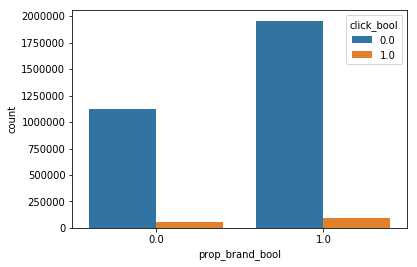

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(df.prop_brand_bool,hue=df.click_bool)

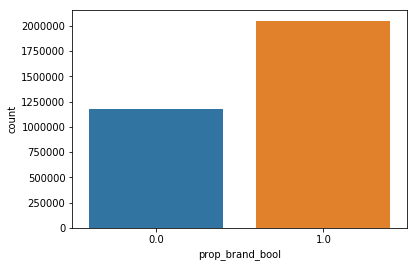

In [6]:
sns.countplot(df.prop_brand_bool)
#This is a skewed column but being binary there is nothing we can really do about it. 
#this info doesnt help us much in any analysis. 

### 3.2 Hotels by Country Id

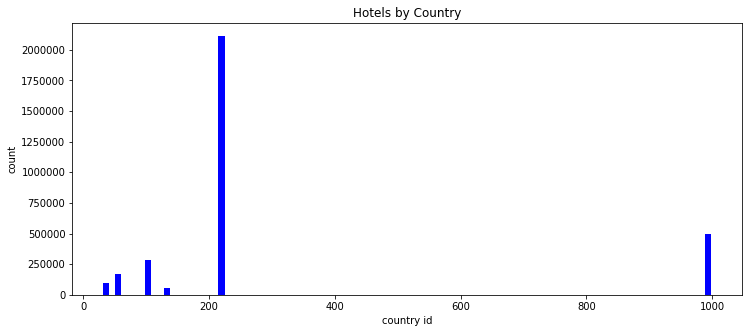

In [7]:
plt.figure(figsize=(12,5))
plt.hist(df.prop_country_id_binned, bins=100,facecolor='blue')
plt.xlabel('country id')
plt.ylabel('count')
plt.title('Hotels by Country')
plt.show()

In [8]:
df.prop_country_id.value_counts()

219    1973622
100     199928
55      121931
31       98445
99       87067
129      59552
215      52175
220      45983
59       45923
216      40309
98       34886
158      27125
117      20496
132      18997
205      18821
39       18593
92       17646
103      16296
15       15499
81       12841
32       12785
14       12397
202      12342
4        12276
109      11460
73       11150
41       10388
56       10280
80        9702
225       9228
        ...   
124         94
179         94
112         73
143         73
83          72
171         67
44          59
120         50
136         45
20          43
192         41
1           37
172         37
197         33
82          29
25          25
167         25
185         21
141         21
19          17
226         16
128         15
217         14
87          13
111         13
180         12
208         12
7           10
204          5
140          5
Name: prop_country_id, Length: 159, dtype: int64

In [9]:
df.groupby('prop_country_id').size().nlargest(5)

prop_country_id
219    1973622
100     199928
55      121931
31       98445
99       87067
dtype: int64

#### From which country do we have most of our visitors.

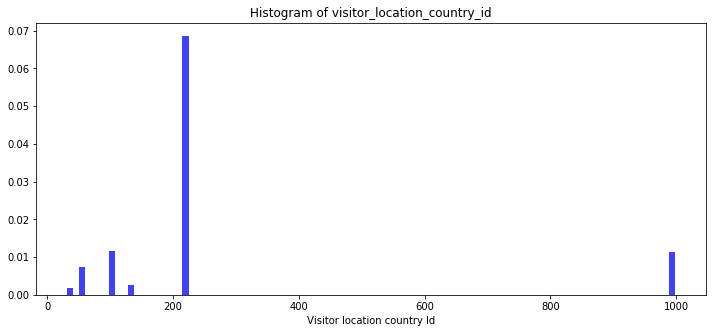

In [12]:
plt.figure(figsize=(12,5))
plt.hist(df.visitor_location_country_id_binned, 100, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Visitor location country Id')
plt.title('Histogram of visitor_location_country_id')
plt.show()

In [13]:
df.groupby('visitor_location_country_id').size().nlargest(5)

visitor_location_country_id
219    1884112
100     320373
55      190293
216     141583
220     114436
dtype: int64

####  Count Plot of Click Vs Non Click data

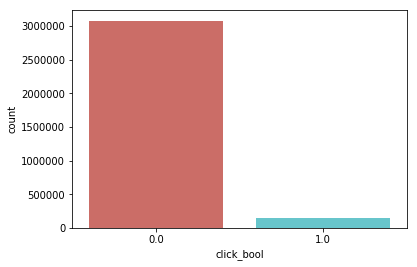

In [14]:
sns.countplot(x='click_bool',data=df, palette='hls')
plt.show()

### 3.3 Property Rating of Hotels 

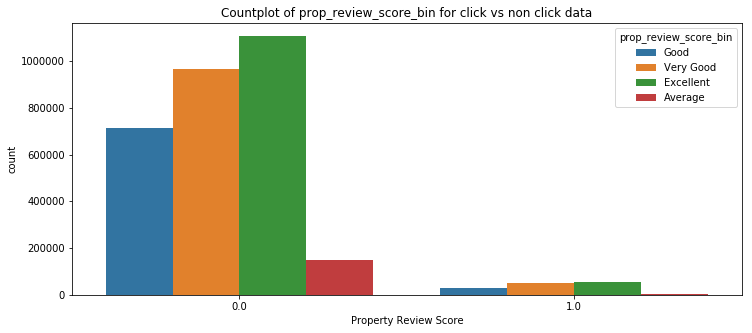

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(df.click_bool,hue=df.prop_review_score_bin)
plt.xlabel('Property Review Score')
plt.title('Countplot of prop_review_score_bin for click vs non click data')
plt.show()

### 3.4 Children occupancy

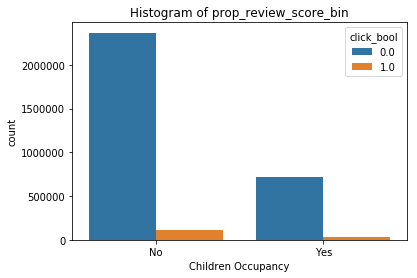

In [16]:
sns.countplot(df.children_occupancy,hue=df.click_bool)
plt.xlabel('Children Occupancy')
plt.title('Histogram of prop_review_score_bin')
plt.show()

We can see that mostly people who book hotels are not looking for children occupancy. 

### 3.5 Effect of Price USD on Click Data and Non click data

(0, 200)

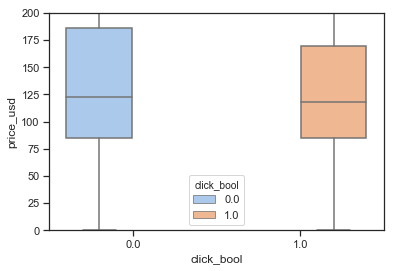

In [17]:
sns.set(style="ticks", palette="pastel")
ax = sns.boxplot(x="click_bool", y="price_usd", hue="click_bool", data=df)
ax.set_ylim([0, 200])

### 3.6  Most Searched places by users

In [18]:
search_data = df.srch_destination_id.value_counts().head(10)
dfs = pd.DataFrame({'Search_destination_id':search_data.index,'Number_of_Searches':search_data.values})
dfs

,Number_of_Searches,Search_destination_id
0,45592,8192.0
1,36767,4562.0
2,26986,9402.0
3,21647,8347.0
4,21256,10979.0
5,20957,13292.0
6,18925,13870.0
7,17751,18774.0
8,16802,23904.0
9,15817,24700.0


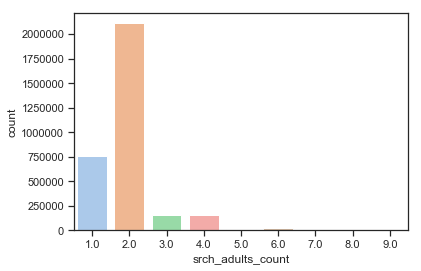

In [19]:
sns.countplot(df.srch_adults_count)

#### Inference
There is a high ratio of couples in our dataset

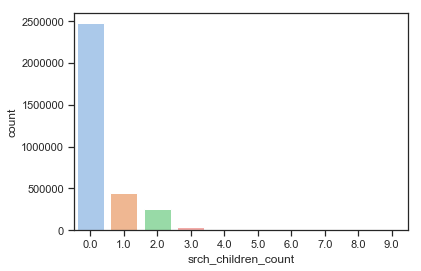

In [21]:
sns.countplot(df.srch_children_count)

### 3.7  Which month had most number of clicks or searches

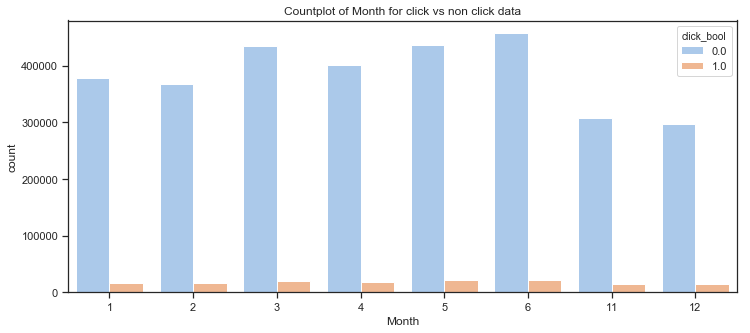

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(df.Month,hue=df.click_bool)
plt.xlabel('Month')
plt.title('Countplot of Month for click vs non click data')
plt.show()

#### Inference
* We can see that users mostly used our site in March, May and June. 

### 3.8  For month which had highest searches , which places did the users search for ie prop_id

In [23]:
df.Month = df.Month.astype(str)

In [24]:
popular_mnths = ['3','5','6']
df_popular_mnths = df[df.Month.isin(popular_mnths)]

In [25]:
df_popular_mnths.shape

(1391334, 41)

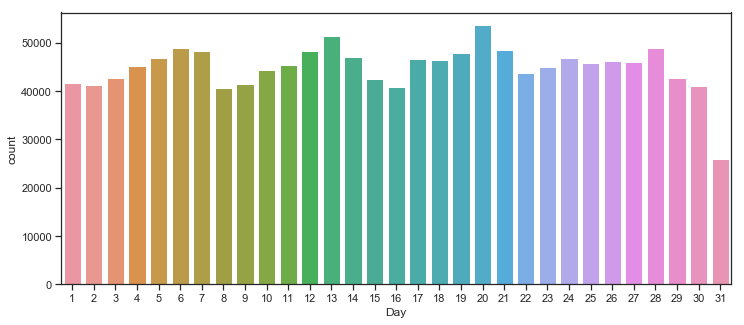

In [26]:
#df_popular_mnths.Day.value_counts()
plt.figure(figsize=(12,5))
sns.countplot(df_popular_mnths.Day)

Inference:
* 13 and 20th seem to be the most popular days followed by 29th 

In [27]:
df_popular_mnths.prop_id.value_counts()

124342    584
104517    571
40279     561
59781     555
68420     549
49656     545
137997    542
134154    539
59657     539
38419     535
46274     534
60468     534
77089     532
60846     527
94455     526
77795     525
35223     524
21018     521
37818     519
116942    518
14082     515
24545     515
122112    506
70177     495
78500     495
117294    492
90845     486
3213      484
53494     484
125083    478
         ... 
54751       1
73190       1
97770       1
87535       1
108017      1
114162      1
128507      1
31177       1
45520       1
37332       1
57818       1
72165       1
104949      1
5572        1
3527        1
44499       1
34262       1
62936       1
64985       1
60891       1
73189       1
87532       1
85487       1
114161      1
110067      1
101879      1
122365      1
137604      1
133510      1
133567      1
Name: prop_id, Length: 105932, dtype: int64

In [28]:
df_popular_mnths.srch_destination_id.value_counts()

8192.0     16844
4562.0     15960
9402.0     11475
10979.0    10005
13292.0     9357
8347.0      8445
18774.0     7928
23904.0     7278
6948.0      7209
13216.0     7183
24700.0     6842
13870.0     6577
26067.0     6533
3694.0      6508
15307.0     6139
21871.0     5920
3073.0      5635
5143.0      5608
20319.0     5536
15122.0     5235
17713.0     4803
13539.0     4682
7714.0      4620
2303.0      4536
25426.0     4210
15620.0     4167
9265.0      3946
6991.0      3767
20438.0     3641
1815.0      3526
           ...  
19517.0        5
2021.0         5
6587.0         5
19698.0        5
19800.0        5
23411.0        5
1407.0         5
19906.0        5
1461.0         5
26215.0        5
19293.0        5
6302.0         5
1480.0         5
11149.0        5
23794.0        5
18742.0        5
23758.0        5
18771.0        5
11026.0        5
18924.0        5
26145.0        5
19242.0        5
23673.0        5
19105.0        5
19123.0        5
19143.0        5
26171.0        5
2091.0        

### 3.9  Price trend of the hotels which had most number of clicks in that given month

(0, 900)

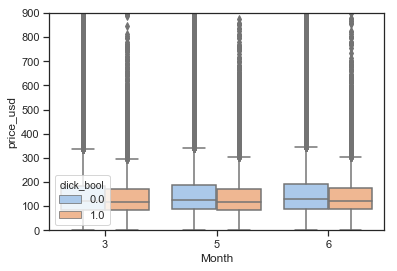

In [29]:
sns.set(style="ticks", palette="pastel")
ax = sns.boxplot(x="Month", y="price_usd",hue='click_bool', data=df_popular_mnths)
ax.set_ylim([0, 900])
#ax.set_xlim([0,500])

### 3.10  Which destinations are popular in which month

In [30]:
#sns.countplot(df.Month,hue=df.srch_destination_id_binned)
pd.crosstab(df.Month,df.srch_destination_id_binned)

srch_destination_id_binned,44.0,570.0,982.0,1815.0,1986.0,2142.0,2303.0,2518.0,3073.0,3694.0,...,25556.0,25964.0,26067.0,26392.0,27620.0,27730.0,28150.0,28172.0,28317.0,999999.0
Month,,,,,,,,,,,,,,,,,,,,,
1,615,826,708,1104,782,616,1020,852,1932,980,...,627,1095,1484,754,682,1120,599,674,1216,293641
11,317,784,698,794,772,482,641,725,1396,258,...,588,764,1036,509,387,844,650,1069,1205,236050
12,637,890,480,548,421,405,811,632,1649,467,...,644,707,1230,395,426,935,379,683,822,227776
2,414,843,1137,489,928,972,1413,809,1377,1164,...,879,697,1187,503,692,720,390,983,932,288831
3,673,566,1111,1077,826,544,1647,898,1687,1899,...,1267,472,2116,688,601,777,979,1286,1186,342604
4,477,1143,731,1268,624,907,1720,609,1714,1357,...,961,589,1154,579,947,687,648,811,1275,320067
5,942,841,1012,1300,1004,1028,1554,597,2245,1932,...,999,562,1706,707,950,856,738,1025,748,347447
6,1114,1082,1026,1149,884,1186,1335,1013,1703,2677,...,539,474,2711,1176,534,665,719,852,825,362348


### 3.11  Number of Searches by year, checking if the trend is increasing or decreasing

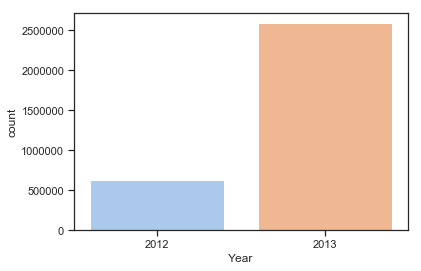

In [31]:
sns.countplot(df.Year)

In [32]:
df.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,booking_bool,site_id_binned,visitor_location_country_id_binned,prop_country_id_binned,prop_id_binned,srch_destination_id_binned,srch_lenth_of_stay_bin,Year,Day,Hour
count,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,...,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06,3.224001e+06
mean,1.081559e+05,9.933804e+00,1.755115e+02,1.741365e+02,7.008551e+04,3.181345e+00,3.778575e+00,6.354595e-01,2.871932e+00,1.065067e-01,...,2.786134e-02,1.603074e+01,2.731501e+02,3.131491e+02,9.801315e+05,7.535935e+05,2.378112e+00,2.012803e+03,1.565481e+01,1.369047e+01
std,6.255664e+04,7.639813e+00,6.585953e+01,6.827944e+01,4.061174e+04,1.050822e+00,1.048096e+00,4.813012e-01,1.530059e+00,1.477814e-01,...,1.645755e-01,2.455208e+01,2.602244e+02,2.986514e+02,1.347254e+05,4.270753e+05,1.967003e+00,3.973943e-01,8.686741e+00,5.424752e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e+00,3.100000e+01,3.100000e+01,1.230000e+03,4.400000e+01,1.000000e+00,2.012000e+03,1.000000e+00,0.000000e+00
25%,5.390100e+04,5.000000e+00,1.000000e+02,1.000000e+02,3.504200e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.610000e-02,...,0.000000e+00,5.000000e+00,2.160000e+02,2.190000e+02,9.999990e+05,9.999990e+05,1.000000e+00,2.013000e+03,8.000000e+00,1.000000e+01
50%,1.083350e+05,5.000000e+00,2.190000e+02,2.190000e+02,6.963000e+04,3.000000e+00,4.000000e+00,1.000000e+00,2.770000e+00,4.190000e-02,...,0.000000e+00,5.000000e+00,2.190000e+02,2.190000e+02,9.999990e+05,9.999990e+05,2.000000e+00,2.013000e+03,1.600000e+01,1.400000e+01
75%,1.624130e+05,1.400000e+01,2.190000e+02,2.190000e+02,1.051760e+05,4.000000e+00,4.500000e+00,1.000000e+00,4.040000e+00,1.372000e-01,...,0.000000e+00,1.500000e+01,2.190000e+02,2.190000e+02,9.999990e+05,9.999990e+05,3.000000e+00,2.013000e+03,2.300000e+01,1.800000e+01
max,2.165260e+05,3.400000e+01,2.310000e+02,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,6.980000e+00,1.000000e+00,...,1.000000e+00,9.900000e+01,9.990000e+02,9.990000e+02,9.999990e+05,9.999990e+05,1.500000e+01,2.013000e+03,3.100000e+01,2.300000e+01


### 3.12  Popular times for users ie when do they search the most

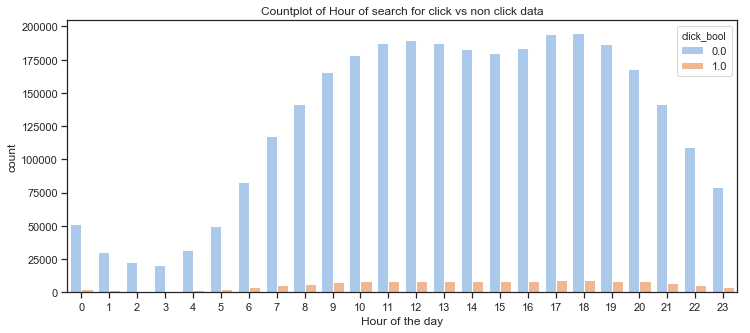

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(df.Hour,hue=df.click_bool)
plt.xlabel('Hour of the day')
plt.title('Countplot of Hour of search for click vs non click data')
plt.show()

### 3.13 Considering only US data, what is the average distance people travel in the country

In [34]:
df_us = df[(df.prop_country_id == 219) & (df.visitor_location_country_id == 219)]

In [35]:
df_us.orig_destination_distance.mean()

599.7012927560371

In [36]:
df_us.price_usd.mean()

160.66407521546446

### 3.14 Effect of promotion flag on click

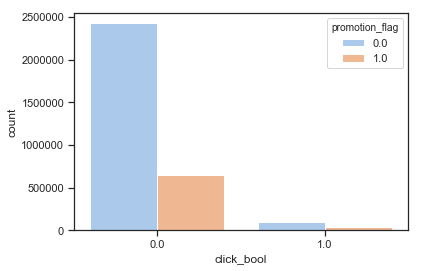

In [37]:
sns.countplot(df.click_bool,hue=df.promotion_flag)

### 3.15 Search Length of Stay 

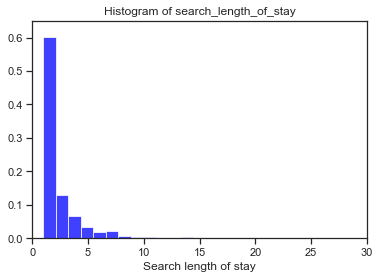

In [118]:
plt.hist(df.srch_length_of_stay, 50, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Search length of stay')
plt.title('Histogram of search_length_of_stay')
plt.axis([0, 30, 0, 0.65])
plt.show()

## 4. Model Building

#### 4.1 Removing redundant features and splitting data into train and test

In [38]:
df1 = df.copy()

In [39]:
print(df1.shape)
df1.columns

(3224001, 41)


Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool', 'site_id_binned',
       'visitor_location_country_id_binned', 'prop_country_id_binned',
       'prop_id_binned', 'srch_destination_id_binned',
       'srch_lenth_of_stay_bin', 'Date', 'Time', 'Year', 'Month', 'Day',
       'prop_review_score_bin', 'children_occupancy', 'Desirability', 'Hour'],
      dtype='object')

In [40]:
df1.drop(['site_id','visitor_location_country_id','prop_country_id','prop_id','booking_bool','srch_destination_id','srch_length_of_stay','date_time','srch_id','Date','Time','srch_children_count','Desirability','prop_review_score_bin','srch_room_count'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3224001 entries, 0 to 3224000
Data columns (total 26 columns):
prop_starrating                       float64
prop_review_score                     float64
prop_brand_bool                       float64
prop_location_score1                  float64
prop_location_score2                  float64
prop_log_historical_price             float64
position                              float64
price_usd                             float64
promotion_flag                        float64
srch_booking_window                   float64
srch_adults_count                     float64
srch_saturday_night_bool              float64
orig_destination_distance             float64
random_bool                           float64
click_bool                            float64
site_id_binned                        int64
visitor_location_country_id_binned    int64
prop_country_id_binned                int64
prop_id_binned                        int64
srch_destination_id_b

In [41]:
object_dt = ['Day','Month','Year','srch_destination_id_binned','prop_id_binned','prop_country_id_binned','visitor_location_country_id_binned','site_id_binned','srch_saturday_night_bool','prop_brand_bool','random_bool','click_bool']
for col in df1.columns:
    if col in object_dt:
        df1[col] = df1[col].astype(object)
        
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3224001 entries, 0 to 3224000
Data columns (total 26 columns):
prop_starrating                       float64
prop_review_score                     float64
prop_brand_bool                       object
prop_location_score1                  float64
prop_location_score2                  float64
prop_log_historical_price             float64
position                              float64
price_usd                             float64
promotion_flag                        float64
srch_booking_window                   float64
srch_adults_count                     float64
srch_saturday_night_bool              object
orig_destination_distance             float64
random_bool                           object
click_bool                            object
site_id_binned                        object
visitor_location_country_id_binned    object
prop_country_id_binned                object
prop_id_binned                        object
srch_destination_id_b

In [42]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(df1,test_size=0.3,random_state=70)

In [43]:
print(train.shape)
train.columns

(2256800, 26)


Index(['prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_booking_window', 'srch_adults_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'site_id_binned', 'visitor_location_country_id_binned',
       'prop_country_id_binned', 'prop_id_binned',
       'srch_destination_id_binned', 'srch_lenth_of_stay_bin', 'Year', 'Month',
       'Day', 'children_occupancy', 'Hour'],
      dtype='object')

In [44]:
train.click_bool.value_counts()

0.0    2155695
1.0     101105
Name: click_bool, dtype: int64

#### 4.2 Under Sampling of the train data

In [45]:
click_indices = train[train.click_bool == 1].index #0.40 
#random_indices = np.random.choice(click_indices, 101105, replace=False) #0.40 , using np.random.choice as its faster
click_sample = train.loc[click_indices]


not_click_indices = train[train.click_bool == 0].index
random_indices = np.random.choice(not_click_indices,151700, replace=False) #0.60
not_click_sample = train.loc[random_indices]

df_train = pd.concat([not_click_sample, click_sample], axis=0)
df_train.shape

(252805, 26)

In [46]:
 df_train.click_bool.value_counts()

0.0    151700
1.0    101105
Name: click_bool, dtype: int64

In [47]:
df_train.columns

Index(['prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_booking_window', 'srch_adults_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'site_id_binned', 'visitor_location_country_id_binned',
       'prop_country_id_binned', 'prop_id_binned',
       'srch_destination_id_binned', 'srch_lenth_of_stay_bin', 'Year', 'Month',
       'Day', 'children_occupancy', 'Hour'],
      dtype='object')

#### 4.3 Removing Outliers

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252805 entries, 2478995 to 2350062
Data columns (total 26 columns):
prop_starrating                       252805 non-null float64
prop_review_score                     252805 non-null float64
prop_brand_bool                       252805 non-null object
prop_location_score1                  252805 non-null float64
prop_location_score2                  252805 non-null float64
prop_log_historical_price             252805 non-null float64
position                              252805 non-null float64
price_usd                             252805 non-null float64
promotion_flag                        252805 non-null float64
srch_booking_window                   252805 non-null float64
srch_adults_count                     252805 non-null float64
srch_saturday_night_bool              252805 non-null object
orig_destination_distance             252805 non-null float64
random_bool                           252805 non-null object
click_bool       

In [49]:
df_train_bkp = df_train.copy()

In [50]:
def cap_outlier(col_name,df_in):
    q1, q3= np.percentile(df_in[col_name],[25,75])
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-(1.5*iqr)
    fence_high = q3+(1.5*iqr)
    df_in[col_name][df_in[col_name] < fence_low] = fence_low
    df_in[col_name][df_in[col_name] > fence_high] = fence_high
    return df_in

##### 1. prop_log_historical_price

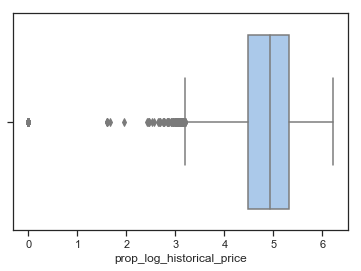

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(x=df_train['prop_log_historical_price'])

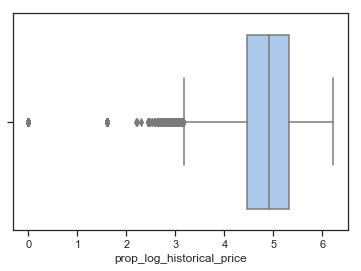

In [53]:
import seaborn as sns
sns.boxplot(x=test['prop_log_historical_price'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: 

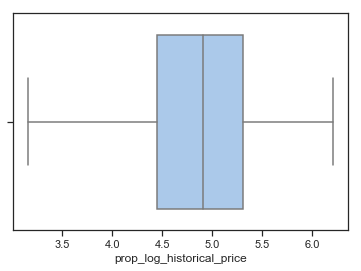

In [54]:
#capping outliers
test = cap_outlier('prop_log_historical_price',test)
sns.boxplot(x=test['prop_log_historical_price'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


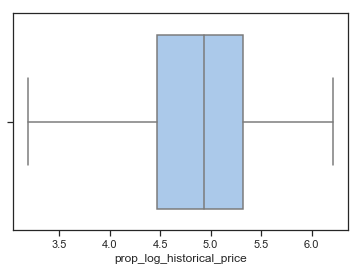

In [55]:
df_train = cap_outlier('prop_log_historical_price',df_train)
sns.boxplot(df_train['prop_log_historical_price'])


In [56]:
##### 2. price_usd

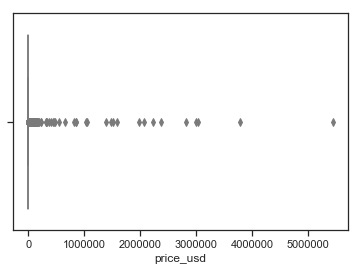

In [57]:
sns.boxplot(x=df_train['price_usd'])

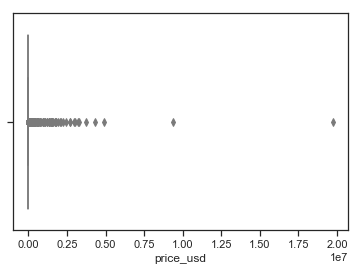

In [58]:
sns.boxplot(x=test['price_usd'])

In [59]:
df_train[df_train.price_usd == 0]

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_booking_window,...,visitor_location_country_id_binned,prop_country_id_binned,prop_id_binned,srch_destination_id_binned,srch_lenth_of_stay_bin,Year,Month,Day,children_occupancy,Hour
2362118,3.0,0.0,0,2.77,0.0277,3.195,28.0,0.0,1.0,2.0,...,999,999,999999,999999,3.0,2013,2,21,No,17
1436044,3.0,4.5,0,5.02,0.3694,3.195,30.0,0.0,1.0,22.0,...,999,999,999999,999999,1.0,2013,6,5,Yes,20


In [60]:
test[test.price_usd == 0]

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_booking_window,...,visitor_location_country_id_binned,prop_country_id_binned,prop_id_binned,srch_destination_id_binned,srch_lenth_of_stay_bin,Year,Month,Day,children_occupancy,Hour
2362141,3.0,0.0,0,2.77,0.0358,4.42,31.0,0.0,1.0,2.0,...,999,999,999999,999999,3.0,2013,2,21,No,17
1436036,3.0,3.5,0,5.14,0.0862,3.16,6.0,0.0,1.0,22.0,...,999,999,999999,999999,1.0,2013,6,5,Yes,20


In [61]:
#Removing such rows
df_train = df_train[df_train.price_usd != 0]
test = test[test.price_usd != 0]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


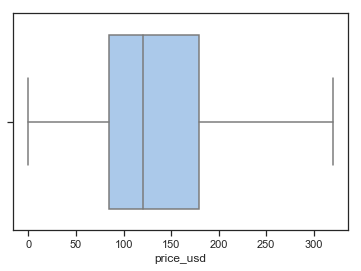

In [62]:
df_train = cap_outlier('price_usd',df_train)
sns.boxplot(df_train['price_usd'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


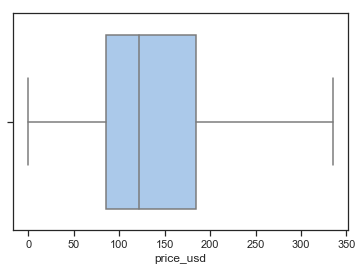

In [63]:
test = cap_outlier('price_usd',test)
sns.boxplot(test['price_usd'])

##### 3. prop_review_score

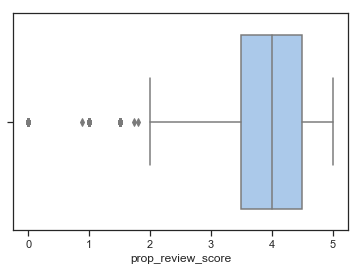

In [65]:
sns.boxplot(x=df_train['prop_review_score'])

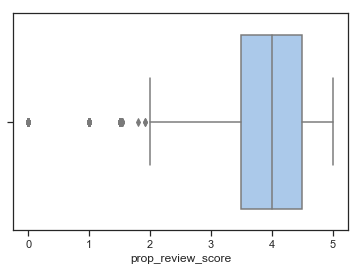

In [66]:
sns.boxplot(test['prop_review_score'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


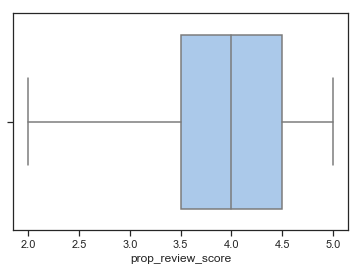

In [67]:
test = cap_outlier('prop_review_score',test)
sns.boxplot(test['prop_review_score'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


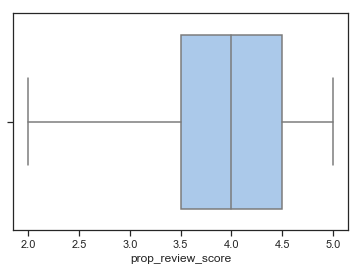

In [68]:
df_train = cap_outlier('prop_review_score',df_train)
sns.boxplot(df_train['prop_review_score'])

In [69]:
df_train.shape

(252803, 26)

In [70]:
test.shape

(967199, 26)

##### 4. prop_location_score1

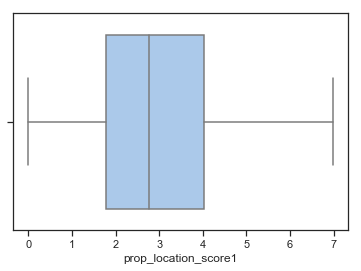

In [71]:
sns.boxplot(x=df_train['prop_location_score1'])

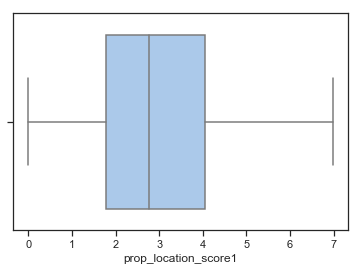

In [72]:
sns.boxplot(x=test['prop_location_score1'])

##### 5. prop_location_score2

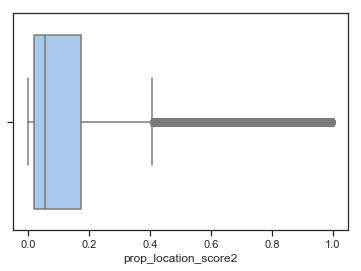

In [73]:
sns.boxplot(x=df_train['prop_location_score2'])

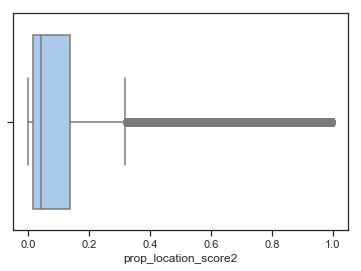

In [74]:
sns.boxplot(x=test['prop_location_score2'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


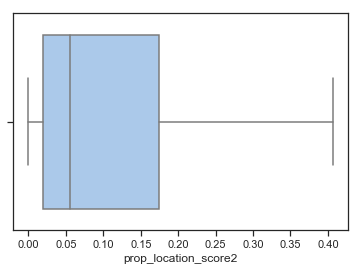

In [75]:
df_train = cap_outlier('prop_location_score2',df_train)
sns.boxplot(df_train['prop_location_score2'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


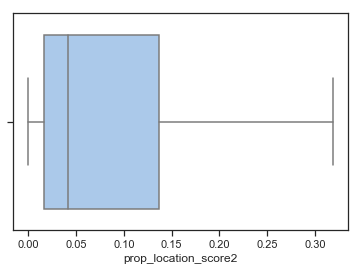

In [76]:
test = cap_outlier('prop_location_score2',test)
sns.boxplot(test['prop_location_score2'])

##### 6. srch_booking_window

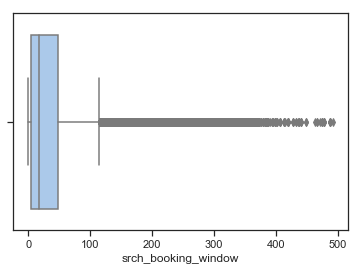

In [78]:
sns.boxplot(x=df_train['srch_booking_window'])

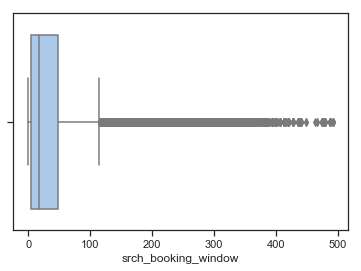

In [81]:
sns.boxplot(x=test['srch_booking_window'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


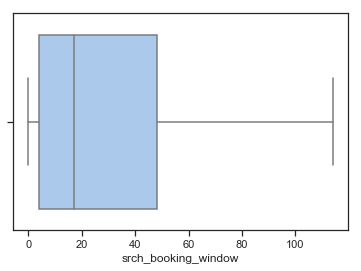

In [82]:
df_train = cap_outlier('srch_booking_window',df_train)
sns.boxplot(df_train['srch_booking_window'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


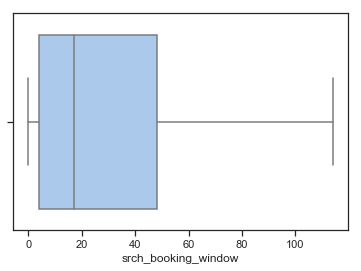

In [83]:
test = cap_outlier('srch_booking_window',test)
sns.boxplot(test['srch_booking_window'])

##### 7. orig_destination_distance

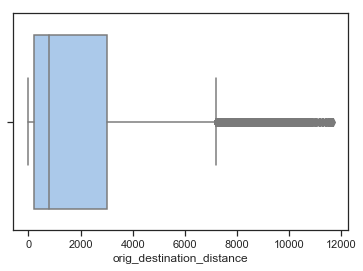

In [84]:
sns.boxplot(x=df_train.orig_destination_distance)

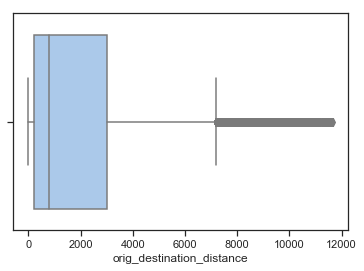

In [85]:
sns.boxplot(x=test['orig_destination_distance'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


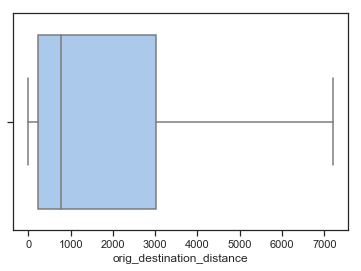

In [86]:
df_train = cap_outlier('orig_destination_distance',df_train)
sns.boxplot(df_train['orig_destination_distance'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


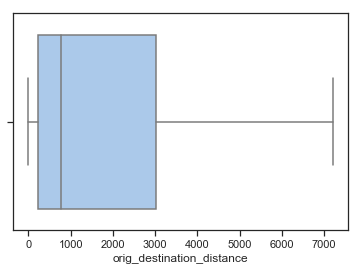

In [87]:
test = cap_outlier('orig_destination_distance',test)
sns.boxplot(test['orig_destination_distance'])

#Dataframes with outliers removed
df_train.to_csv('df_train.csv',index=False)
test.to_csv('test.csv',index=False)

In [88]:
df_train.columns

Index(['prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_booking_window', 'srch_adults_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'site_id_binned', 'visitor_location_country_id_binned',
       'prop_country_id_binned', 'prop_id_binned',
       'srch_destination_id_binned', 'srch_lenth_of_stay_bin', 'Year', 'Month',
       'Day', 'children_occupancy', 'Hour'],
      dtype='object')

#### 4.4 Feature Selection using Random Forest

In [89]:
# One Hot Encoding
X_train = df_train.loc[:,~df_train.columns.isin(['click_bool'])]
y_train = df_train['click_bool']
X_train_dummy = pd.get_dummies(X_train,drop_first=True,prefix_sep='_')

X_test = test.loc[:,~test.columns.isin(['click_bool'])]
y_test = test['click_bool']
X_test_dummy = pd.get_dummies(X_test,drop_first=True,prefix_sep='_')

In [90]:
X_train_dummy.columns

Index(['prop_starrating', 'prop_review_score', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_booking_window',
       'srch_adults_count',
       ...
       'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29',
       'Day_30', 'Day_31', 'children_occupancy_Yes'],
      dtype='object', length=222)

In [91]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_dummy, y_train.astype(int))
selected_feat= X_train_dummy.columns[(sel.get_support())]
print('The selected features are ',selected_feat)

The selected features are  Index(['prop_starrating', 'prop_review_score', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_booking_window',
       'srch_adults_count', 'orig_destination_distance',
       'srch_lenth_of_stay_bin', 'Hour', 'prop_brand_bool_1.0',
       'srch_saturday_night_bool_1.0', 'random_bool_1.0',
       'visitor_location_country_id_binned_219', 'prop_country_id_binned_219',
       'srch_destination_id_binned_999999.0', 'Year_2013', 'Month_11',
       'Month_12', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'children_occupancy_Yes'],
      dtype='object')


In [92]:
print(X_train_dummy.shape)
X_train_dummy.columns

(252803, 222)


Index(['prop_starrating', 'prop_review_score', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_booking_window',
       'srch_adults_count',
       ...
       'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29',
       'Day_30', 'Day_31', 'children_occupancy_Yes'],
      dtype='object', length=222)

In [93]:
filter_cols = [col for col in X_train_dummy if (col.startswith('Day') )]
filter_cols

['Day_2',
 'Day_3',
 'Day_4',
 'Day_5',
 'Day_6',
 'Day_7',
 'Day_8',
 'Day_9',
 'Day_10',
 'Day_11',
 'Day_12',
 'Day_13',
 'Day_14',
 'Day_15',
 'Day_16',
 'Day_17',
 'Day_18',
 'Day_19',
 'Day_20',
 'Day_21',
 'Day_22',
 'Day_23',
 'Day_24',
 'Day_25',
 'Day_26',
 'Day_27',
 'Day_28',
 'Day_29',
 'Day_30',
 'Day_31']

In [94]:
X_train_dummy_new = X_train_dummy.drop(filter_cols,axis=1)

In [95]:
X_train_dummy_new.shape

(252803, 192)

In [96]:
X_test_dummy_new = X_test_dummy.drop(filter_cols,axis=1)
X_test_dummy_new.shape

(967199, 192)

#### 4.5 Decision Tree Model 

###### 4.5.1 Without Tuning

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as sm
from sklearn.metrics import auc

dt = DecisionTreeClassifier().fit(X_train_dummy_new,y_train.astype(int))
pred = dt.predict(X_test_dummy_new)
print(dt)
print((sm.accuracy_score(y_test.astype(int),pred)))
print(sm.classification_report(y_test.astype(int),pred))

# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = sm.roc_curve(y_test.astype(int),pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC SCORE ",roc_auc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6681996155910004
              precision    recall  f1-score   support

           0       0.97      0.67      0.80    924115
           1       0.07      0.52      0.12     43084

   micro avg       0.67      0.67      0.67    967199
   macro avg       0.52      0.60      0.46    967199
weighted avg       0.93      0.67      0.77    967199

ROC AUC SCORE  0.5988525312280738


###### 4.5.2 With Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [20,30,40,50]

# Minimum number of samples required to split a node
min_samples_split = [100, 200,300,500]

# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50,70]

# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [20, 30, 50, 70], 'max_depth': [20, 30, 40, 50], 'min_samples_split': [100, 200, 300, 500]}


In [99]:
import datetime

print("Start of Randomized Search CV ",datetime.datetime.now())
dt_random_srch = RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=30,random_state=0,cv=5)
# Fit the random search model
dt_random_srch.fit(X_train_dummy_new,y_train.astype(int))
print("End of Randomized Search CV ",datetime.datetime.now())

Start of Randomized Search CV  2019-05-08 23:34:06.212874
End of Randomized Search CV  2019-05-08 23:38:12.621175


In [100]:
dt_random_srch.best_params_

{'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 300}

In [107]:
dt = DecisionTreeClassifier(random_state=0,max_depth=40,max_features='sqrt',min_samples_leaf=50,min_samples_split=300).fit(X_train_dummy_new,y_train.astype(int))
pred = dt.predict(X_test_dummy_new)
print(dt)
print((sm.accuracy_score(y_test.astype(int),pred)))
print(sm.classification_report(y_test.astype(int),pred))

# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = sm.roc_curve(y_test.astype(int),pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC SCORE ",roc_auc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=300,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
0.816244640451448
              precision    recall  f1-score   support

           0       0.97      0.84      0.90    924115
           1       0.09      0.35      0.15     43084

   micro avg       0.82      0.82      0.82    967199
   macro avg       0.53      0.59      0.52    967199
weighted avg       0.93      0.82      0.86    967199

ROC AUC SCORE  0.5946614156456661


#### 4.5 Random Forest

##### without tuning

In [102]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train_dummy,y_train.astype(int))
pred = rf.predict(X_test_dummy)
print((sm.accuracy_score(y_test.astype(int),pred)))
print(sm.classification_report(y_test.astype(int),pred))
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = sm.roc_curve(y_test.astype(int),pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8105849985370126
              precision    recall  f1-score   support

           0       0.97      0.82      0.89    924115
           1       0.12      0.52      0.20     43084

   micro avg       0.81      0.81      0.81    967199
   macro avg       0.55      0.67      0.55    967199
weighted avg       0.94      0.81      0.86    967199

0.6737184151642438


##### with tuning

In [103]:
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [20,30,40,50]

# Minimum number of samples required to split a node
min_samples_split = [100, 200,300,500]

# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50,70]

bootstrap=[True,False]

n_estimators = [100,200,300,400,500]

# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'n_estimators':n_estimators,
                'bootstrap':bootstrap}

print(random_grid)


print("Start of Randomized Search CV ",datetime.datetime.now())
rf_random_srch = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,random_state=0,cv=3)
# Fit the random search model
rf_random_srch.fit(X_train_dummy_new,y_train.astype(int))
print("End of Randomized Search CV ",datetime.datetime.now())

{'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [20, 30, 50, 70], 'bootstrap': [True, False], 'max_depth': [20, 30, 40, 50], 'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [100, 200, 300, 500]}
Start of Randomized Search CV  2019-05-08 23:41:15.093144
End of Randomized Search CV  2019-05-09 03:01:20.027795


In [104]:
rf_random_srch.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 30,
 'min_samples_split': 100,
 'n_estimators': 200}

In [105]:
#boostrap = False
rf = RandomForestClassifier(n_estimators=300,min_samples_split=100,min_samples_leaf=30,max_depth=40,max_features='sqrt',bootstrap=False,random_state=0).fit(X_train_dummy,y_train.astype(int))
pred = rf.predict(X_test_dummy)
print((sm.accuracy_score(y_test.astype(int),pred)))
print(sm.classification_report(y_test.astype(int),pred))
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = sm.roc_curve(y_test.astype(int),pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8271544945766073
              precision    recall  f1-score   support

           0       0.97      0.84      0.90    924115
           1       0.13      0.50      0.21     43084

   micro avg       0.83      0.83      0.83    967199
   macro avg       0.55      0.67      0.55    967199
weighted avg       0.94      0.83      0.87    967199

0.673161889384041


In [106]:
#boostrap = True
rf = RandomForestClassifier(n_estimators=300,min_samples_split=100,min_samples_leaf=30,max_depth=40,max_features='sqrt',bootstrap=True,random_state=0).fit(X_train_dummy,y_train.astype(int))
pred = rf.predict(X_test_dummy)
print((sm.accuracy_score(y_test.astype(int),pred)))
print(sm.classification_report(y_test.astype(int),pred))
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = sm.roc_curve(y_test.astype(int),pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8287374159816129
              precision    recall  f1-score   support

           0       0.97      0.84      0.90    924115
           1       0.13      0.50      0.21     43084

   micro avg       0.83      0.83      0.83    967199
   macro avg       0.55      0.67      0.56    967199
weighted avg       0.94      0.83      0.87    967199

0.6724855212717243


##### with only Important features given by the model

In [110]:
X_train_selected = X_train_dummy[['prop_starrating', 'prop_review_score', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_booking_window',
       'srch_adults_count', 'orig_destination_distance',
       'srch_lenth_of_stay_bin', 'Hour', 'prop_brand_bool_1.0',
       'srch_saturday_night_bool_1.0', 'random_bool_1.0',
       'visitor_location_country_id_binned_219', 'prop_country_id_binned_219',
       'srch_destination_id_binned_999999.0', 'Year_2013', 'Month_11',
       'Month_12', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'children_occupancy_Yes']]

X_test_selected = X_test_dummy[['prop_starrating', 'prop_review_score', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_booking_window',
       'srch_adults_count', 'orig_destination_distance',
       'srch_lenth_of_stay_bin', 'Hour', 'prop_brand_bool_1.0',
       'srch_saturday_night_bool_1.0', 'random_bool_1.0',
       'visitor_location_country_id_binned_219', 'prop_country_id_binned_219',
       'srch_destination_id_binned_999999.0', 'Year_2013', 'Month_11',
       'Month_12', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'children_occupancy_Yes']]

In [111]:
X_test_selected.shape

(967199, 28)

In [112]:
X_test_dummy.shape

(967199, 222)

##### running with only features selected by Random Forest 

In [113]:
rf1 = RandomForestClassifier(n_estimators=300,min_samples_split=100,min_samples_leaf=30,max_depth=40,max_features='sqrt',bootstrap=True,random_state=0).fit(X_train_selected,y_train.astype(int))
pred = rf1.predict(X_test_selected)
print((sm.accuracy_score(y_test.astype(int),pred)))
print(sm.classification_report(y_test.astype(int),pred))
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = sm.roc_curve(y_test.astype(int),pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8096854938849193
              precision    recall  f1-score   support

           0       0.97      0.82      0.89    924115
           1       0.12      0.54      0.20     43084

   micro avg       0.81      0.81      0.81    967199
   macro avg       0.55      0.68      0.55    967199
weighted avg       0.94      0.81      0.86    967199

0.682076908637447


#### 4.6 Xgboost

##### without tuning using only selected features

In [115]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0,learning_rate=0.1, n_estimators=100).fit(X_train_selected,y_train.astype(int))
pred = xgb.predict(X_test_selected)
print((sm.accuracy_score(y_test.astype(int),pred)))
print(sm.classification_report(y_test.astype(int),pred))
fpr, tpr, threshold = sm.roc_curve(y_test.astype(int),pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8070603877795572
              precision    recall  f1-score   support

           0       0.97      0.82      0.89    924115
           1       0.12      0.54      0.20     43084

   micro avg       0.81      0.81      0.81    967199
   macro avg       0.55      0.68      0.55    967199
weighted avg       0.94      0.81      0.86    967199

0.680990830493612


##### with tuning using only selected features

In [117]:
from sklearn.model_selection import RandomizedSearchCV
# Set a list of parameters
random_grid = {
    
            'max_depth':range(3,10,2),
    
            #minimum sum of weights of all observations required in a child, similar to min_child_leaf 
            'min_child_weight':range(1,6,2),
    
            'learning_rate':[0.1,0.2,0.3],
    
            #A node is split only when the resulting split gives a positive reduction in the loss function. 
            #Gamma specifies the minimum loss reduction required to make a split.
            'gamma':[i/10.0 for i in range(0,5)],
    
            #In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. 
            #If it is set to a positive value, it can help making the update step more conservative.
            # might help in logistic regression when class is extremely imbalanced.
            'max_delta_step':[1,2],
    
            #Denotes the fraction of observations to be randomly samples for each tree.
            'subsample':[i/10.0 for i in range(6,10)],
    
            #Similar to max_features, Denotes the fraction of columns to be randomly samples for each tree. [default=1]
            'colsample_bytree':[i/10.0 for i in range(6,10)],
            
            #reg_lambda [default=1] L2 regularization term on weights (analogous to Ridge regression)
            #'reg_lambda':[],
    
            #reg_alpha [default=0] L1 regularization term on weight (analogous to Lasso regression)
    
            #scale_pos_weight [default=1]
            #A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
            'scale_pos_weight':[1,2,3]
            
            
}

import datetime
print("Start of Randomized Search CV ",datetime.datetime.now())
xgb_brandom_clf = RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,n_iter=10,random_state=0,cv=3,scoring='roc_auc')
xgb_brandom_clf.fit(X_train_selected,y_train.astype(int))
print("End of Randomized Search CV ",datetime.datetime.now())
print("Best params ", xgb_brandom_clf.best_params_) 
print("Best score ", xgb_brandom_clf.best_score_)

Start of Randomized Search CV  2019-05-09 13:47:04.428791
End of Randomized Search CV  2019-05-09 14:23:46.105442
Best params  {'max_delta_step': 2, 'scale_pos_weight': 2, 'subsample': 0.9, 'max_depth': 7, 'learning_rate': 0.1, 'min_child_weight': 5, 'gamma': 0.2, 'colsample_bytree': 0.9}
Best score  0.7657315597434207


In [127]:
xgb = XGBClassifier(random_state=0,max_delta_step=2,scale_pos_weight=2,subsample=0.9,max_depth=8,learning_rate=0.1,n_estimators=200,min_child_weight=5,gamma=0,colsample_bytree=0.9).fit(X_train_selected,y_train.astype(int))
pred = xgb.predict(X_test_selected)
print((sm.accuracy_score(y_test.astype(int),pred)))
print(sm.classification_report(y_test.astype(int),pred))
fpr, tpr, threshold = sm.roc_curve(y_test.astype(int),pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6236203718159344
              precision    recall  f1-score   support

           0       0.98      0.62      0.76    924115
           1       0.09      0.77      0.15     43084

   micro avg       0.62      0.62      0.62    967199
   macro avg       0.53      0.69      0.46    967199
weighted avg       0.94      0.62      0.73    967199

0.6933904138450403


## Conclusion

* So we started with the dataset of 32 lakh records and downsampled the data to 2.52 lakhs for training and implemented various
Tree classification models like Decision Trees, Random Forest and XGBoost with tuning. Our final ROC score was 0.69 with macro
avg of F1 score of  on a test size of 9.67 lakh records. 